# Word Embeddings, Clustering and Vectorization Workshop

##  Workshop Objectives
- Document Collection, Tokenizer, Normalization Pipeline on a relevant corpus.
- Implement **Word2Vec** (CBOW & Skip-gram) on Brown Corpus
- Implement **GloVe** (count-based approach) on Brown Corpus  
- Compare Word2Vec vs GloVe performance
- Build complete NLP pipeline: Document Collection → Tokenization → Normalization → Training

---


# Part 1: Document Collection, Tokenizer, Nomalization Pipeline 
## Step 1: Load Brown Corpus

The **Brown Corpus** is a standard corpus in NLTK containing diverse English text samples from various genres. We'll use it as our knowledge corpus for training word embeddings.

In [ ]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import os

# Set up nltk_data path
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
print("Downloading 'punkt' tokenizer...")
nltk.download('punkt', download_dir=nltk_data_path, force=True)
print("Downloading 'punkt_tab' tokenizer...")
nltk.download('punkt_tab', download_dir=nltk_data_path, force=True)

# Always append the custom nltk_data path (if not already present)
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

print("\n✓ Libraries imported successfully!")
print(f"NLTK Data Path: {nltk_data_path}")

In [115]:
# ========================================
# PREVIOUS SAMPLE CODE (for reference only)
# ========================================
# Sample Sentence
# text = """
# Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. NLP techniques aim to enable computers to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant.
# """
# tokenized_words = word_tokenize(text.lower())

# ========================================
# WORKSHOP: Using Brown Corpus
# ========================================

# Import required libraries
from nltk.corpus import brown, stopwords

# Download Brown corpus and stopwords
print("Downloading Brown corpus...")
nltk.download('brown', download_dir=nltk_data_path, quiet=True)
print("Downloading stopwords...")
nltk.download('stopwords', download_dir=nltk_data_path, quiet=True)

# Load Brown Corpus (using 5000 sentences for training)
print("\nLoading Brown Corpus...")
brown_sentences = brown.sents()[:5000]
print(f"Loaded {len(brown_sentences)} sentences from Brown Corpus")
print(f"\nExample sentence: {brown_sentences[0][:15]}...")  # Show first 15 words


Loading Brown Corpus...
Loaded 5000 sentences from Brown Corpus

Example sentence: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced']...


In [ ]:
def normalize_corpus(sentences):
    """
    Apply text normalization pipeline to corpus
    
    Pipeline steps:
    1. Convert to lowercase
    2. Remove punctuation
    3. Remove stopwords
    4. Filter short tokens (< 2 characters)
    """
    stop_words = set(stopwords.words('english'))
    normalized_sentences = []
    
    for sentence in sentences:
        # Step 1: Lowercase
        tokens = [word.lower() for word in sentence]
        
        # Steps 2-4: Remove punctuation, stopwords, and short tokens
        cleaned_tokens = [
            word for word in tokens 
            if word.isalpha() and len(word) >= 2 and word not in stop_words
        ]
        
        # Keep sentences with at least 3 words
        if len(cleaned_tokens) >= 3:
            normalized_sentences.append(cleaned_tokens)
    
    return normalized_sentences

print("✓ normalize_corpus() function defined")

In [128]:
# Apply normalization
print("Applying normalization pipeline...")
normalized_corpus = normalize_corpus(brown_sentences)

print(f"\nStatistics:")
print(f"  Original sentences: {len(brown_sentences)}")
print(f"  After normalization: {len(normalized_corpus)}")
print(f"\nBefore: {brown_sentences[0][:10]}")
print(f"After:  {normalized_corpus[0][:10]}")

Applying normalization pipeline...

Statistics:
  Original sentences: 5000
  After normalization: 4564

Before: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']
After:  ['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election']


## Step 2: Text Normalization Pipeline

A proper **normalization pipeline** is essential for quality word embeddings:

1. **Lowercase conversion** - Standardize all text
2. **Punctuation removal** - Remove special characters  
3. **Stopword removal** - Remove common words (the, is, at, etc.)
4. **Token filtering** - Keep only meaningful words (alphabetic, length ≥ 2)

This preprocessing ensures cleaner and more meaningful word representations.

---

# Part 2:  Train Word2Vec Models (CBOW & Skip-gram)

Now we'll train **Word2Vec models** using the normalized Brown corpus. We'll train both:
- **CBOW (Continuous Bag of Words)** - Predicts target word from context
- **Skip-gram** - Predicts context words from target word

#### Model Parameters:
- `sentences`: normalized_corpus (our preprocessed Brown corpus)
- `vector_size=100`: 100-dimensional word vectors
- `window=5`: Context window of 5 words
- `min_count=2`: Ignore words appearing less than 2 times
- `workers=4`: Use 4 CPU threads for training
- `sg=0` for CBOW, `sg=1` for Skip-gram

## Step 1: Train Word2Vec CBOW Model on Brown Corpus

In [117]:
print("Training Word2Vec (CBOW) model on Brown Corpus...")
model_word2vec_brown = Word2Vec(
    sentences=normalized_corpus,  # Our preprocessed Brown corpus
    vector_size=100,               # 100-dimensional vectors
    window=5,                      # Context window of 5 words
    min_count=2,                   # Ignore rare words (< 2 occurrences)
    workers=4,                     # Use 4 CPU threads
    sg=0,                          # CBOW (sg=0), Skip-gram would be sg=1
    epochs=10                      # Train for 10 epochs
)

print(f"✓ Model trained successfully!")
print(f"  Vocabulary size: {len(model_word2vec_brown.wv)}")
print(f"  Vector dimensions: {model_word2vec_brown.wv.vector_size}")

# Save the model
model_word2vec_brown.save('word2vec_brown_cbow.model')
print(f"  Model saved to: word2vec_brown_cbow.model")

Training Word2Vec (CBOW) model on Brown Corpus...
✓ Model trained successfully!
  Vocabulary size: 5827
  Vector dimensions: 100
  Model saved to: word2vec_brown_cbow.model
✓ Model trained successfully!
  Vocabulary size: 5827
  Vector dimensions: 100
  Model saved to: word2vec_brown_cbow.model


## Step 2: Train Word2Vec Skip-gram Model on Brown Corpus

In [118]:
# ========================================
# PREVIOUS SAMPLE CODE (for reference only)
# ========================================
# Create a model
# model_word2Vec = Word2Vec(sentences=[tokenized_words], vector_size=100, 
#                           window=5,  min_count=1, workers=4)


print("\nTraining Word2Vec (Skip-gram) model on Brown Corpus...")
model_skipgram_brown = Word2Vec(
    sentences=normalized_corpus,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1,                          # Skip-gram architecture
    epochs=10
)

print(f"✓ Skip-gram model trained successfully!")
print(f"  Vocabulary size: {len(model_skipgram_brown.wv)}")
print(f"  Vector dimensions: {model_skipgram_brown.wv.vector_size}")

# Save the model
model_skipgram_brown.save('word2vec_brown_skipgram.model')
print(f"  Model saved to: word2vec_brown_skipgram.model")


Training Word2Vec (Skip-gram) model on Brown Corpus...
✓ Skip-gram model trained successfully!
  Vocabulary size: 5827
  Vector dimensions: 100
  Model saved to: word2vec_brown_skipgram.model
✓ Skip-gram model trained successfully!
  Vocabulary size: 5827
  Vector dimensions: 100
  Model saved to: word2vec_brown_skipgram.model


##  Step 3: Test Word2Vec Models

Let's test both models by finding similar words to a test word.

In [119]:
# Test both models with a sample word
test_word = "government"

print(f"Testing models with word: '{test_word}'\n")

# Test CBOW model
if test_word in model_word2vec_brown.wv:
    print(f"CBOW Model - Most similar words to '{test_word}':")
    similar_cbow = model_word2vec_brown.wv.most_similar(test_word, topn=5)
    for word, score in similar_cbow:
        print(f"  {word}: {score:.4f}")
else:
    print(f"'{test_word}' not in CBOW vocabulary")

print()

# Test Skip-gram model
if test_word in model_skipgram_brown.wv:
    print(f"Skip-gram Model - Most similar words to '{test_word}':")
    similar_skipgram = model_skipgram_brown.wv.most_similar(test_word, topn=5)
    for word, score in similar_skipgram:
        print(f"  {word}: {score:.4f}")
else:
    print(f"'{test_word}' not in Skip-gram vocabulary")

Testing models with word: 'government'

CBOW Model - Most similar words to 'government':
  would: 0.9998
  said: 0.9998
  also: 0.9998
  could: 0.9998
  american: 0.9998

Skip-gram Model - Most similar words to 'government':
  laos: 0.9692
  efforts: 0.9686
  military: 0.9661
  defense: 0.9643
  help: 0.9641


## Step 4: Analyze Word Vectors

Now let's examine the actual word vectors and find similar words using both trained models.

In [120]:
# Get word vector for a specific word from both models
word = "natural"

# CBOW model vector
if word in model_word2vec_brown.wv:
    vector_cbow = model_word2vec_brown.wv[word]
    print(f"CBOW Model - Word vector for '{word}':")
    print(f"  {vector_cbow}")
    print()
else:
    print(f"'{word}' not in CBOW vocabulary\n")

# Skip-gram model vector
if word in model_skipgram_brown.wv:
    vector_skipgram = model_skipgram_brown.wv[word]
    print(f"Skip-gram Model - Word vector for '{word}':")
    print(f"  {vector_skipgram}")
else:
    print(f"'{word}' not in Skip-gram vocabulary")

CBOW Model - Word vector for 'natural':
  [-0.04644626  0.06856788  0.0320065   0.03281647 -0.00416705 -0.09339954
  0.02175629  0.12778173 -0.03176699 -0.0289446  -0.0242039  -0.10155372
 -0.02850443  0.01488518  0.0149162  -0.06878944  0.00498424 -0.08099672
  0.00310061 -0.13728462  0.05895402  0.01695284  0.06542978 -0.02628292
 -0.00233495 -0.00099097 -0.0356237  -0.01903888 -0.06651406 -0.01530039
  0.08135932 -0.01956979 -0.01100203 -0.05148241  0.00670887  0.0337664
  0.00415815 -0.0567039  -0.01297883 -0.12091544  0.00900636 -0.07769113
 -0.03487848  0.02998968  0.03546791 -0.02986629 -0.08799121  0.00701687
  0.04220778  0.05496738  0.01315959 -0.05825744 -0.05128738 -0.0199456
 -0.06234313  0.02809827  0.03242612 -0.02770561 -0.07015087  0.02426731
  0.03675597  0.03959789 -0.03394132 -0.00190862 -0.06464383  0.04448081
 -0.01430479  0.03151668 -0.06519315  0.04690659 -0.03815943  0.06355716
  0.08744405 -0.02664324  0.06910083  0.03538213 -0.0024045  -0.01606079
 -0.0346819

---

# Appendix A: Understanding Word2Vec Theory

## 📊 Understanding Word Vectors in Word2Vec

#### 🔢 Code Recap

```python
# Get word vector for a specific word
word = "natural"
vector_word2Vec = model_word2Vec.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_word2Vec}")
```

This code retrieves the **vector representation (embedding)** of the word `"natural"` from the trained Word2Vec model.

#### 🧠 What Is a Word Vector?

In **Word2Vec**, every word in your vocabulary is represented by a **dense vector** of real numbers.

* Each word becomes a **point** in a high-dimensional space.
* Words that appear in similar contexts are placed **closer together**.
* These vectors are learned by a shallow neural network during training.

The output you see is a **vector with 100 dimensions**, because we set `vector_size=100` when training the model.

#### ✍️ What Do These Numbers Mean?

The output:

```python
[ 9.7677782e-03, 8.1660571e-03, ..., -2.3143364e-03 ]
```

...is a list of 100 floating-point numbers, like:

$$
\vec{v}_{\text{natural}} = [v_1, v_2, v_3, \ldots, v_{100}]
$$

This vector encodes the **semantic meaning** of the word *natural* based on its context in the training data.

While **each individual number doesn't mean anything by itself**, together they represent a **position** in a 100-dimensional space.

#### 🔍 Why Is This Useful?

You can perform various mathematical operations with these vectors:

#### **Similarity** between words

We can compute **cosine similarity** to check how similar two words are:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

If two word vectors point in a similar direction (small angle), they are semantically similar.

#### 🧮 Summary

* The output is a **100-dimensional vector** for the word `"natural"`.
* Each dimension is a learned number that helps position the word in a semantic space.
* These vectors are powerful tools for **clustering**, **search**, **recommendations**, and more.

In [121]:
# Find similar words from both models
word = "natural"

print(f"Finding similar words to '{word}' using both models:\n")

# CBOW model
if word in model_word2vec_brown.wv:
    similar_cbow = model_word2vec_brown.wv.most_similar(word, topn=10)
    print(f"CBOW Model - Top 10 similar words:")
    for similar_word, similarity in similar_cbow:
        print(f"  {similar_word}: {similarity:.4f}")
    print()
else:
    print(f"'{word}' not in CBOW vocabulary\n")

# Skip-gram model
if word in model_skipgram_brown.wv:
    similar_skipgram = model_skipgram_brown.wv.most_similar(word, topn=10)
    print(f"Skip-gram Model - Top 10 similar words:")
    for similar_word, similarity in similar_skipgram:
        print(f"  {similar_word}: {similarity:.4f}")
else:
    print(f"'{word}' not in Skip-gram vocabulary")

Finding similar words to 'natural' using both models:

CBOW Model - Top 10 similar words:
  evening: 0.9936
  political: 0.9935
  times: 0.9935
  fine: 0.9934
  belief: 0.9934
  honor: 0.9934
  street: 0.9934
  kind: 0.9934
  added: 0.9934
  son: 0.9934

Skip-gram Model - Top 10 similar words:
  belief: 0.9982
  predicted: 0.9981
  waiting: 0.9981
  corruption: 0.9980
  colony: 0.9980
  desire: 0.9980
  doubtless: 0.9980
  reaching: 0.9980
  electric: 0.9980
  levitt: 0.9979


### 📊 Summary: Comparing CBOW vs Skip-gram Results

We trained **two Word2Vec models** on the Brown Corpus:

#### 🔹 Model Comparison

| Model Type | Architecture | Training Focus |
|------------|--------------|----------------|
| **CBOW** | Continuous Bag of Words | Predicts **target word** from **context words** |
| **Skip-gram** | Skip-gram | Predicts **context words** from **target word** |

#### 🔍 Key Observations

1. **Word Vectors**
   - Both models generate 100-dimensional vectors for each word
   - The actual vector values differ between CBOW and Skip-gram
   - Each vector captures semantic meaning based on the model's learning approach

2. **Similar Words**
   - Both models identify semantically related words
   - CBOW tends to work better with **frequent words** (faster training)
   - Skip-gram tends to work better with **rare words** (captures more nuanced relationships)
   - The similarity rankings may differ between the two models

3. **Use Cases**
   - **CBOW**: Better for larger datasets, faster training, good for frequent words
   - **Skip-gram**: Better for smaller datasets, captures rare word relationships better

---

# Part 3: GloVe Implementation on Brown Corpus

## Introduction to GloVe

**GloVe (Global Vectors for Word Representation)** is a count-based word embedding model that learns vector representations using **global word co-occurrence statistics** from a corpus.

Unlike Word2Vec (which uses local context windows), GloVe builds a **co-occurrence matrix** and factorizes it to learn word vectors.

### Key Differences: Word2Vec vs GloVe

| Feature | Word2Vec | GloVe |
|---------|----------|-------|
| **Approach** | Predictive (neural network) | Count-based (matrix factorization) |
| **Training** | Local context window | Global co-occurrence statistics |
| **Speed** | Slower on large corpora | Faster with pre-computed matrix |
| **Rare Words** | Skip-gram handles better | Struggles with rare words |

---

## 🔍 Finding Similar Words with Word2Vec

#### 🔢 Code Recap

```python
# Find similar words
similar_words_word2Vec = model_word2Vec.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_word2Vec}")
```

This code retrieves the **top 10 words** that are most similar to the word `"natural"` according to the Word2Vec model.

#### 🧠 What Does "Similar" Mean in Word2Vec?

Word2Vec considers words to be similar if their **vector representations** are **close together** in high-dimensional space.

This closeness is measured using **cosine similarity**:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

Where:

* $\vec{v}_a$ and $\vec{v}_b$ are the word vectors.
* $\cdot$ is the dot product.
* $\|\vec{v}\|$ is the magnitude (length) of vector $\vec{v}$.

This produces a value between **-1 and 1**:

* **1** → perfectly similar (same direction)
* **0** → no similarity (orthogonal)
* **-1** → completely opposite

#### 📤 Example Output Explained

```python
[('the', 0.182), ('computers', 0.173), ('nlp', 0.167), ('between', 0.156), ...]
```

This means:

| Word       | Cosine Similarity |
| ---------- | ----------------: |
| the        |             0.182 |
| computers  |             0.173 |
| nlp        |             0.167 |
| between    |             0.156 |
| way        |             0.133 |
| techniques |             0.122 |
| human      |             0.112 |
| is         |             0.111 |
| .          |             0.109 |
| in         |             0.097 |

These words appeared in **similar contexts** to `"natural"` in the training data.

💡 Example: If the training sentences included phrases like *"natural language processing"*, and also had *"nlp techniques"*, *"human language"*, or *"way computers process language"*, then `"nlp"`, `"human"`, `"techniques"`, and `"computers"` would naturally be nearby in vector space.

#### 🎯 Summary

* Word2Vec learned that these words tend to appear **in similar contexts** to `"natural"`.
* The similarity is calculated using **cosine similarity** on the word vectors.
* The output is a **ranked list** of the most contextually similar words.

You can use this method for:

* **Synonym detection**
* **Query expansion in search engines**
* **Exploring semantic relationships in text**

## 🧠 Understanding Skip-grams in Word2Vec

### 🔁 What Are Skip-grams?

A **Skip-gram** is a training approach used in Word2Vec that **predicts context words given a center word**.

> 🔑 Goal: For a given target word, predict the words that are likely to appear nearby in a sentence.

#### 📚 How Does Skip-gram Work?

Let's take a sentence:

```
"The field of natural language processing is growing."
```

If the center word is `"natural"` and the window size is 2, the context window is:

```python
["of", "natural", "language", "processing"]
```

The skip-gram model will create training pairs like:

```python
("natural", "of"), ("natural", "language")
```
<br/>

🧠 The model **learns embeddings** by trying to **maximize the probability** of seeing context words given the center word.

#### 📐 The Skip-gram Objective Function

The skip-gram model aims to maximize the following log-likelihood objective over a large corpus:

$$
\frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log P(w_{t+j} \mid w_t)
$$

Where:

* $T$ is the total number of words in the corpus
* $w_t$ is the center word
* $w_{t+j}$ are the surrounding context words
* $c$ is the window size

The probability $P(w_{t+j} \mid w_t)$ is computed using softmax:

$$
P(w_O \mid w_I) = \frac{\exp\left({\vec{v}_{w_O}^\top \vec{v}_{w_I}}\right)}{\sum_{w = 1}^{V} \exp\left({\vec{v}_w^\top \vec{v}_{w_I}}\right)}
$$

Where:

* $\vec{v}_{w_I}$: vector of the input word (center)
* $\vec{v}_{w_O}$: vector of the output/context word
* $V$: vocabulary size

#### 🧭 Summary

| Component           | Role                                                     |
| ------------------- | -------------------------------------------------------- |
| Skip-gram Objective | Predicts context words based on a center word            |
| sg=1                | Enables skip-gram architecture in `Word2Vec()`           |
| Output Vector       | A 100D numeric representation of the word "natural"      |
| Similar Words       | Top 10 words that share similar context to "natural"     |
| Math Mechanism      | Uses dot products and softmax to update vector positions |

---

# Appendix B: Brown Clustering (Reference)

### 🧠 Clustering Words based on Co-occurrence Pattern - **Brown Clustering**

> Brown Clustering is a method to cluster words based on their co-occurrence patterns.

> It starts with each word as a separate cluster and iteratively merges the most similar clusters based on their co-occurrence patterns.

> Brown Clustering is used for tasks like named entity recognition, word sense disambiguation, and topic modeling.

### Brown Corpus Clustering Tutorial

In this notebook, we will explore **word clustering** using the Brown corpus from NLTK. The goal is to visualize clusters of words based on their **co-occurrence patterns** using a **dendrogram**.

---

### Concepts Covered

1. **Brown Corpus**: A large collection of English text samples from 1961. It contains text from multiple genres, useful for NLP experiments.

2. **Vocabulary and Co-occurrence**:
   - Vocabulary (`vocab`): The set of unique words in a corpus.
   - Co-occurrence matrix: A square matrix where each entry `(i, j)` counts how often word `i` appears near word `j` within a defined **window size**.

3. **Word Clustering**:
   - Words that appear in similar contexts tend to have similar meanings.
   - We can use the co-occurrence matrix to cluster words hierarchically.

4. **Hierarchical Clustering & Dendrograms**:
   - **Hierarchical clustering** groups words step-by-step based on similarity.
   - A **dendrogram** is a tree diagram that shows the hierarchy of clusters.


In [122]:
# Step 1: Import Libraries
import nltk
from nltk.corpus import brown
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Make sure nltk_data path is correct
nltk.data.path.append(r"nltk_data")  # Folder containing nltk_data

### Step 2: Load the Corpus

- We will use a subset of the Brown corpus for faster computation.
- All words are converted to lowercase to avoid duplicates due to capitalization.


In [123]:
# Load first 50 sentences from Brown corpus
corpus = brown.sents()[:50]
corpus = [[word.lower() for word in sent] for sent in corpus]


### Step 3: Build Vocabulary

- The vocabulary is a sorted list of unique words in the corpus.
- We create a mapping from word → index for matrix operations.


In [124]:
vocab = sorted(set(word for sent in corpus for word in sent))
word_to_idx = {word: i for i, word in enumerate(vocab)}


### Step 4: Construct Co-occurrence Matrix

- For each word in a sentence, we count nearby words within a **window size**.
- The co-occurrence matrix is `V x V` where `V` = number of unique words.
- Each entry `(i, j)` represents how often word `i` occurs near word `j`.


In [125]:
window_size = 2
V = len(vocab)
co_matrix = np.zeros((V, V))

for sentence in corpus:
    for i, word in enumerate(sentence):
        wi = word_to_idx[word]
        for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
            if j != i:
                cj = word_to_idx[sentence[j]]
                co_matrix[wi, cj] += 1


### Step 5: Hierarchical Clustering

- We use **Ward's method** to perform hierarchical clustering.
- Ward's method minimizes variance within clusters.


In [126]:
linkage_matrix = linkage(co_matrix, method='ward')


### Step 6: Visualize Dendrogram

- A **dendrogram** shows hierarchical relationships between words.
- Leaves closer together represent words that frequently appear in similar contexts.


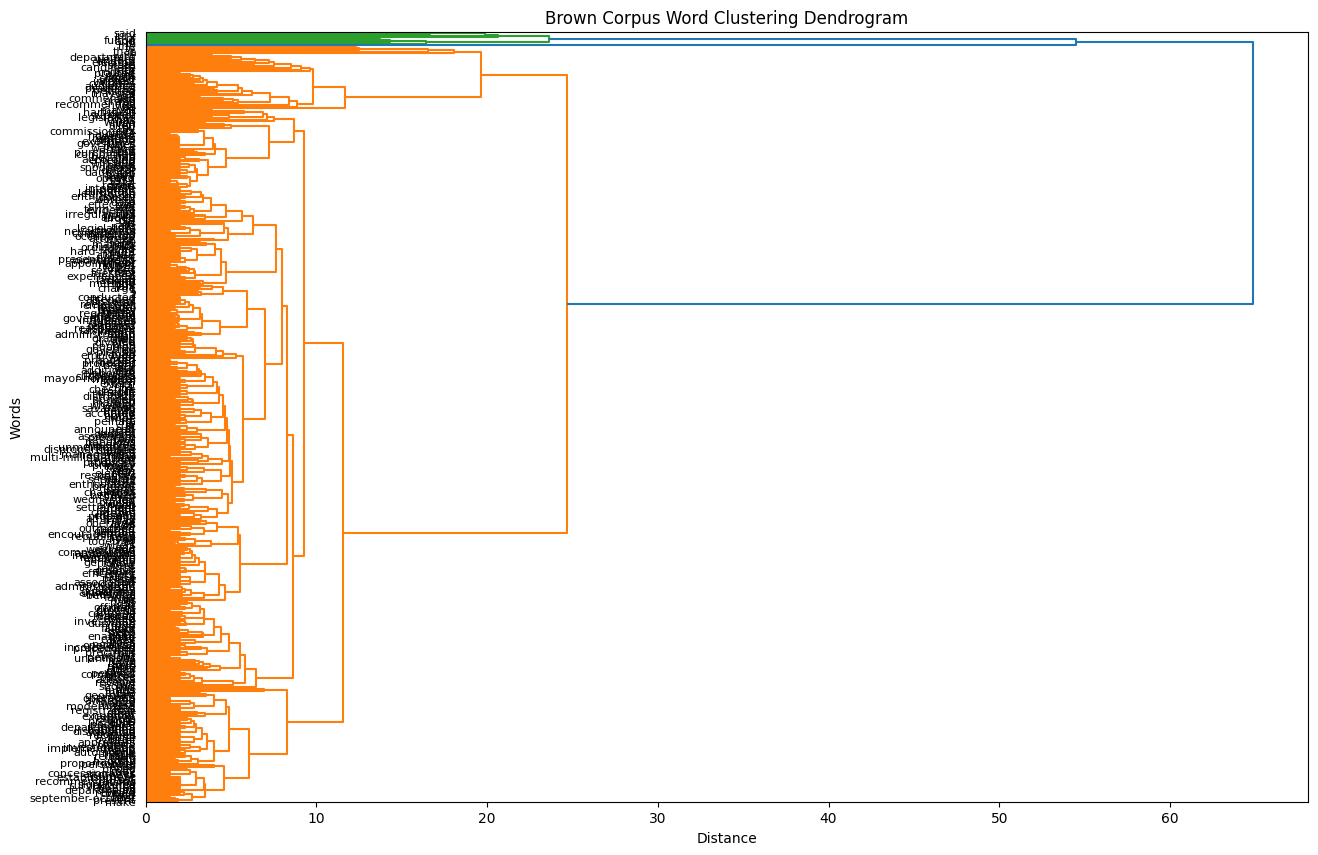

In [127]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=vocab, orientation='right', leaf_font_size=8)
plt.xlabel('Distance')
plt.ylabel('Words')
plt.title('Brown Corpus Word Clustering Dendrogram')
plt.show()


### Summary 

- **Brown Corpus** provides a real-world dataset to explore word patterns.
- **Co-occurrence matrices** help capture the context of words.
- **Hierarchical clustering** and **dendrograms** are tools to visualize relationships between words.
- This is the foundation for more advanced NLP models, such as **Word2Vec**, **GloVe**, or **Brown clustering algorithms** used in language modeling.




#### Creating a Co-occurrence Matrix

```python
window_size = 2
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
```

* Builds a **square matrix** of size *(vocab\_size × vocab\_size)*.
* Each cell $(i, j)$ in the matrix counts how often **word i** appears within the **window** of **word j**.

#### Simulate Brown Clustering

```python
num_clusters = 2
...
```

* Assigns each word to its own cluster initially.
* Iteratively **merges the two most strongly co-occurring clusters**.
* This continues until only the desired number of clusters remains.

#### Final Output

```python
final_clusters[word] = cluster_id
```

* Produces a dictionary of `{word: cluster_id}` showing the grouping of words.

#### What Is a Co-occurrence Matrix?

It’s a matrix where:

* **Rows and columns = words in vocabulary**
* Each cell $M_{i,j}$ contains the **count of times word $i$** appeared near **word $j$**

$$
M_{i,j} = \text{Number of times } w_i \text{ appears in the context window of } w_j
$$

#### 🧭 Summary

| Step                      | What It Does                                  |
| ------------------------- | --------------------------------------------- |
| Corpus                    | Loads a sentence from the Brown Corpus        |
| Vocabulary                | Extracts all unique words                     |
| Co-occurrence Matrix      | Counts how often words appear near each other |
| Brown Clustering (simple) | Merges similar words into clusters            |
| Final Output              | A dictionary of word-to-cluster mappings      |

#### 🌳 Visualizing Brown Clustering with a Dendrogram

#### 📌 Code Recap

```python
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(co_occurrence_matrix, method='ward')
...
dendrogram(linkage_matrix, labels=list(vocab), orientation='right')
```

This code performs **hierarchical clustering** on the **co-occurrence matrix** and displays it as a **dendrogram**.

<br/>

##### 🌱 What Is a Dendrogram?

A **dendrogram** is a **tree-like diagram** that shows how words are grouped into clusters based on their co-occurrence patterns.

* Each **leaf node** (at the left) is a word from the vocabulary.
* Words that **frequently co-occur** are joined into **branches**.
* The **horizontal axis** shows the **distance** (or dissimilarity) between merged clusters.

  * **Shorter horizontal lines** → more similar words
  * **Longer lines** → more dissimilar

<br/>

### 🧠 What This Means

* The dendrogram shows how the words are **grouped step-by-step**.
* It begins by clustering the **most similar pairs of words** (based on co-occurrence).
* Then it merges those groups into larger clusters.

For example:

* `"jury"` and `"election"` might co-occur often → they appear close together.
* `"the"` and `"of"` may appear often but with many different words, making them less specific.

<br/>

### ⚠️ Why Fewer Words?

> The message in the code mentions:
> "you need to experiment it with less words..."

* That’s because **hierarchical clustering** requires computing pairwise distances.
* Large vocabularies make the **linkage matrix** large and slow to process.
* A **small subset** (e.g., 20–30 words) gives a faster and more readable result.

<br/>

### 📊 Summary Table

| Component           | Role                                           |
| ------------------- | ---------------------------------------------- |
| `linkage()`         | Computes distances for hierarchical clustering |
| `dendrogram()`      | Draws the tree structure of word clusters      |
| X-axis (horizontal) | Dissimilarity between word clusters            |
| Y-axis (vertical)   | Words from the vocabulary                      |
| Short branches      | Words with similar co-occurrence contexts      |



---

# Appendix C: GloVe Theory (Reference)

### 🧠 Introduction to GloVe (Global Vectors for Word Representation)

#### **What is GloVe?**

**Global Vectors for Word Representation (GloVe)** is an unsupervised learning algorithm used **to learn word embeddings** from large amounts of text data. Word embeddings are dense vector representations of words that capture semantic relationships between words based on their co-occurrence statistics. 

**GloVe** is a word embedding model that learns **vector representations of words** by using **global word co-occurrence statistics** from a corpus.

Unlike Word2Vec (which learns embeddings through local context windows), GloVe builds a **co-occurrence matrix** and then learns word vectors from it.

#### **Who developed it and when?**

GloVe was developed by researchers at **Stanford University**:

* **Jeffrey Pennington**, **Richard Socher**, and **Christopher Manning**

It was first introduced in **2014**.

#### **Who currently maintains and supports new releases?**

The official code and pretrained models are available at:

* [https://nlp.stanford.edu/projects/glove](https://nlp.stanford.edu/projects/glove)

GloVe is not actively developed anymore, but the pretrained models are widely used.
Unofficial implementations exist in:

* `Gensim`
* `glove-python` (Python wrapper around original C code)

#### **How do I use GloVe in Python and Jupyter Notebooks?**

There are two common ways:

#### 📦 Option 1: Train Your Own Model

#### **What is a model in GloVe?**

A **GloVe model** is a file that contains:

* A large vocabulary of words
* For each word: a **fixed-length vector** (e.g., 50D, 100D, 300D)

These vectors are learned by factorizing a word-word **co-occurrence matrix** so that **similar words** have **similar vectors**.

### **How to Create a GloVe Model Using Python**

> GloVe training is more complex than Word2Vec and originally written in C. But here's a basic pipeline using `glove-python-binary`:

#### ✅ Step 1: Install the Library

```bash
!pip install glove-python-binary
```

#### ✅ Step 2: Create and Train a GloVe Model

```python
from glove import Corpus, Glove

# Step 1: Prepare your corpus
sentences = [['this', 'is', 'an', 'example'], ['glove', 'is', 'awesome']]

# Step 2: Build a co-occurrence corpus
corpus = Corpus()
corpus.fit(sentences, window=5)

# Step 3: Train the GloVe model
glove_model = Glove(no_components=100, learning_rate=0.05)
glove_model.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove_model.add_dictionary(corpus.dictionary)

# Step 4: Use the model
print(glove_model.word_vectors[glove_model.dictionary['glove']])
print(glove_model.most_similar('glove'))
```

#### 📦 Option 2: Load Pretrained GloVe using Gensim

You can download pretrained GloVe vectors and load them with Gensim.

- Steps: Preprocess the text data.<br>
Created the dictionary.<br>
Traverse the glove file of a specific dimension and compare each word with all words in the dictionary,
if a match occurs, copy the equivalent vector from the glove and paste into embedding_matrix at the corresponding index.<br>


---

# 📋 Workshop Assignment Requirements


Push the final notebook to GitHub and send the `.git` URL to the **assignment dropbox** before the end of class.

## 🧠 Learning Objectives
- Teams of 2 (individual evaluation in class).
- Implement **Word2Vec**  and **GloVe** using real-world data during the NLP process.
- Build **Jupyter Notebooks** with well-structured code and clear Markdown documentation.
- Use **Git and GitHub** for collaborative version control and code sharing.
- Identify and articulate coding issues ("**talking points**") and insert them directly into markdown comments.


## 🧩 Workshop Structure (In Class)
1. **Set up teams of 2 people** – Read and understand the workshop, plus submission instructions. Seek assistance if needed.
2. **Jupyter Notebook Development** *(In class)* – NLP Pipeline (if needed) and Probabilistic Model method implementations + Markdown documentation (work as teams)
3. **Push to GitHub** – Teams commit and push the notebook. **Make sure to include your names so it is easy to identify the team that developed the code**.
4. **Instructor Review** - The instructor will go around in class, take notes, and provide coaching as needed, during the **Peer Review Round**


## 💻 Submission Checklist
- ✅ `EmbeddingClusteringVectorizationWorkshop.ipynb` with:
  - Demo code: Document Collection, Tokenizer, Normalization Pipeline on a relevant corpus.
  - Demo code: Implement a Word2Vec predictive model using the knowledge corpus.
  - Demo code: Implement a GloVe count-based model using the knowledge corpus.
  - Markdown explanations for each major step
  - In a table that compare **Word2Vec** against **GloVe** in the context of the use case that makes use of the knowledge corpus.
- ✅ `README.md` with:
  - Dataset description
  - Team member names
  - Link to the dataset and license (if public)
- ✅ GitHub Repo:
  - Public repo named `EmbeddingClusteringVectorizationWorkshop`
  - **Markdowns and meaningful talking points**